In [3]:
import pandas as pd
for s in range(4):
  for t in range(4):
    # Leggi il CSV
    df = pd.read_csv(f"data/data_jeopardized_{s}_{t}.csv")

    # Crea lista per la heatmap: [lat, lon, value]
    heat_data = df[['latitude', 'longitude', 'value']].values.tolist()
    print(len(heat_data))

    # Calcola centro mappa
    center_lat = df['latitude'].mean()
    center_lon = df['longitude'].mean()

    # Calcola i limiti per la mappa (minimo e massimo di lat e lon)
    min_lat = df['latitude'].min()
    max_lat = df['latitude'].max()
    min_lon = df['longitude'].min()
    max_lon = df['longitude'].max()

    # HTML aggiornato con colorbar e mappa che mostra l'area dei dati
    html = f"""
    <!DOCTYPE html>
    <html>
    <head>
      <meta charset="utf-8" />
      <title>Heatmap</title>
      <meta name="viewport" content="width=device-width, initial-scale=1.0">
      <style>
        #map {{
          height: 98vh;
        }}
        #legend {{
          position: absolute;
          bottom: 30px;
          left: 10px;
          padding: 5px 10px; /* Ridotto padding per dimezzare l'altezza */
          background: white;
          border-radius: 5px;
          font-family: sans-serif;
          font-size: 12px;  /* Ridotto il font-size per adattarsi alla nuova altezza */
          line-height: 1.2;
          box-shadow: 0 0 5px rgba(0, 0, 0, 0.3);
          z-index: 1000;
          height: auto; /* Aggiunto per garantire che la legenda si ridimensioni correttamente */
        }}
        .gradient {{
          height: 15px;
          width: 150px;
          background: linear-gradient(to right, blue, lime, yellow, red);
          margin: 5px 0;
        }}
        .labels {{
          display: flex;
          justify-content: space-between;
        }}
      </style>
      <link rel="stylesheet" href="https://unpkg.com/leaflet/dist/leaflet.css" />
    </head>
    <body>
      <div id="map"></div>
      <div id="legend">
        <div class="gradient"></div>
        <div class="labels">
          <span>Low</span>
          <span>Medium</span>
          <span>High</span>
        </div>
      </div>
      <script src="https://unpkg.com/leaflet/dist/leaflet.js"></script>
      <script src="https://unpkg.com/leaflet.heat/dist/leaflet-heat.js"></script>
      <script>
        // Imposta il centro della mappa sul centro dei dati
        var map = L.map('map').setView([{center_lat}, {center_lon}], 13);

        // Aggiungi i tile di OpenStreetMap
        L.tileLayer('https://{{s}}.tile.openstreetmap.org/{{z}}/{{x}}/{{y}}.png').addTo(map);

        // Aggiungi la heatmap con i dati
        var heat = L.heatLayer({heat_data}, {{
          radius: 15,
          blur: 25,
          maxZoom: 0,
        }}).addTo(map);

        // Imposta i limiti della mappa per includere tutti i dati
        var bounds = [[{min_lat}, {min_lon}], [{max_lat}, {max_lon}]];
        map.fitBounds(bounds); // Adatta la mappa a questi limiti
      </script>
    </body>
    </html>
    """

    # Salva il file HTML
    timestamp = pd.Timestamp.now().strftime("%Y%m%d%H%M%S")
    with open(f"heatmap_{s}_{t}.html", "w", encoding="utf-8") as f:
        f.write(html)

    print("✅ Heatmap generata con colorbar e mappa adattata ai dati.")


4
✅ Heatmap generata con colorbar e mappa adattata ai dati.
4
✅ Heatmap generata con colorbar e mappa adattata ai dati.
4
✅ Heatmap generata con colorbar e mappa adattata ai dati.
4
✅ Heatmap generata con colorbar e mappa adattata ai dati.
4
✅ Heatmap generata con colorbar e mappa adattata ai dati.
4
✅ Heatmap generata con colorbar e mappa adattata ai dati.
4
✅ Heatmap generata con colorbar e mappa adattata ai dati.
4
✅ Heatmap generata con colorbar e mappa adattata ai dati.
4
✅ Heatmap generata con colorbar e mappa adattata ai dati.
4
✅ Heatmap generata con colorbar e mappa adattata ai dati.
4
✅ Heatmap generata con colorbar e mappa adattata ai dati.
4
✅ Heatmap generata con colorbar e mappa adattata ai dati.
4
✅ Heatmap generata con colorbar e mappa adattata ai dati.
4
✅ Heatmap generata con colorbar e mappa adattata ai dati.
4
✅ Heatmap generata con colorbar e mappa adattata ai dati.
4
✅ Heatmap generata con colorbar e mappa adattata ai dati.


### Area colorata

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Funzione per calcolare il punto medio
def midpoint(p1, p2):
    return [(p1[0] + p2[0]) / 2, (p1[1] + p2[1]) / 2]

def create_blue_white_red_colorbar(num_colors=100):
    # Genera 50 colori dal blu al bianco
    blue_to_white = plt.cm.Blues(np.linspace(1, 0, num_colors // 2))
    white_to_red = plt.cm.Reds(np.linspace(0, 1, num_colors // 2))

    # Unisci le due metà
    colorbar = np.vstack((blue_to_white, white_to_red))

    # Converti i colori in formato esadecimale
    hex_colors = ['#' + ''.join([format(int(c * 255), '02X') for c in color[:3]]) for color in colorbar]
    
    return hex_colors

# Funzione per determinare il colore in base al valore
def get_color(value, min_value, max_value):
    # Scala di colori: blu (basso) a rosso (alto)
    color_scale = create_blue_white_red_colorbar(100)

    # Normalizza il valore tra 0 e 1
    normalized_value = (value - min_value) / (max_value - min_value)
    # Mappa il valore normalizzato alla scala di colori
    color_index = int(normalized_value * (len(color_scale) - 1))
    return color_scale[color_index]

for s in range(4):
    for t in range(4):
        # Leggi il CSV
        df = pd.read_csv(f"data/data_sectors_{s}_{t}.csv")

        # Estrai i 4 punti
        p1 = df.iloc[0][['latitude', 'longitude']].tolist()
        p2 = df.iloc[1][['latitude', 'longitude']].tolist()
        p3 = df.iloc[2][['latitude', 'longitude']].tolist()
        p4 = df.iloc[3][['latitude', 'longitude']].tolist()

        # Trova i punti medi tra i punti
        mid_p12 = midpoint(p1, p2)
        mid_p13 = midpoint(p1, p3)
        mid_p14 = midpoint(p1, p4)

        mid_p23 = midpoint(p2, p3)
        mid_p24 = midpoint(p2, p4)

        mid_p34 = midpoint(p3, p4)

        # Crea i rettangoli tra i punti in modo corretto
        rect1 = [p1, mid_p12, mid_p13, mid_p23]
        rect2 = [p2, mid_p12, mid_p23, mid_p24]
        rect3 = [p3, mid_p13, mid_p23, mid_p34]
        rect4 = [p4, mid_p14, mid_p24, mid_p34]

        # Calcola il valore medio per ogni rettangolo
        values = [
            df.iloc[0]['value'],
            df.iloc[1]['value'],
            df.iloc[2]['value'],
            df.iloc[3]['value']
        ]

        colors = [get_color(values[i], 0, 100) for i in range(len(values))]

        # Calcola il centro della mappa
        center_lat = (p1[0] + p2[0] + p3[0] + p4[0]) / 4
        center_lon = (p1[1] + p2[1] + p3[1] + p4[1]) / 4

        # Calcola i limiti per la mappa
        min_lat = df['latitude'].min()
        max_lat = df['latitude'].max()
        min_lon = df['longitude'].min()
        max_lon = df['longitude'].max()

        # HTML aggiornato
        html = f"""
        <!DOCTYPE html>
        <html>
        <head>
          <meta charset="utf-8" />
          <title>Heatmap con Settori Rettangolari</title>
          <meta name="viewport" content="width=device-width, initial-scale=1.0">
          <style>
            #map {{
      height: 98vh;
    }}
    #legend {{
      position: absolute;
      bottom: 30px;
      left: 10px;
      padding: 5px 10px;
      background: white;
      border-radius: 5px;
      font-family: sans-serif;
      font-size: 12px;
      line-height: 1.2;
      box-shadow: 0 0 5px rgba(0, 0, 0, 0.3);
      z-index: 1000;
      height: auto;
    }}
    .gradient {{
      height: 15px;
      width: 150px;
      background: linear-gradient(to right, blue, white, red); /* Il gradiente dal blu al bianco al rosso */
      margin: 5px 0;
    }}
    .labels {{
      display: flex;
      justify-content: space-between;
    }}
          </style>
          <link rel="stylesheet" href="https://unpkg.com/leaflet/dist/leaflet.css" />
        </head>
        <body>
          <div id="map"></div>
            <div id="legend">
              <div class="gradient"></div> <!-- Gradiente da blu a rosso -->
              <div class="labels">
                <span>Low</span> <!-- Etichetta per il basso -->
                <span>Medium</span> <!-- Etichetta per il medio -->
                <span>High</span> <!-- Etichetta per l'alto -->
              </div>
            </div>
          <script src="https://unpkg.com/leaflet/dist/leaflet.js"></script>
          <script src="https://unpkg.com/leaflet.heat/dist/leaflet-heat.js"></script>
          <script>
            // Imposta il centro della mappa sul centro dei dati
            var map = L.map('map', {{center:[{center_lat}, {center_lon}], zoomControl: false, dragging: false, scrollWheelZoom: false, touchZoom: false,boxZoom: false,doubleClickZoom: false}});

            // Aggiungi i tile di OpenStreetMap
            L.tileLayer('https://{{s}}.tile.openstreetmap.org/{{z}}/{{x}}/{{y}}.png').addTo(map);

            // Definizione dei rettangoli
            var rect1 = [[{p1[0]}, {p1[1]}], [{mid_p12[0]}, {mid_p12[1]}], [{mid_p23[0]}, {mid_p23[1]}], [{mid_p13[0]}, {mid_p13[1]}]];
            var rect2 = [[{p2[0]}, {p2[1]}], [{mid_p12[0]}, {mid_p12[1]}], [{mid_p23[0]}, {mid_p23[1]}], [{mid_p24[0]}, {mid_p24[1]}]];
            var rect3 = [[{p3[0]}, {p3[1]}], [{mid_p13[0]}, {mid_p13[1]}], [{mid_p23[0]}, {mid_p23[1]}], [{mid_p34[0]}, {mid_p34[1]}]];
            var rect4 = [[{mid_p14[0]}, {mid_p14[1]}], [{mid_p24[0]}, {mid_p24[1]}], [{p4[0]}, {p4[1]}], [{mid_p34[0]}, {mid_p34[1]}]];

            // Aggiungi i rettangoli alla mappa con il colore determinato
            var polygon1 = L.polygon(rect1, {{color: '{colors[0]}', weight: 1, fillOpacity: 0.4}}).addTo(map);
            var polygon2 = L.polygon(rect2, {{color: '{colors[1]}', weight: 1, fillOpacity: 0.4}}).addTo(map);
            var polygon3 = L.polygon(rect3, {{color: '{colors[2]}', weight: 1, fillOpacity: 0.4}}).addTo(map);
            var polygon4 = L.polygon(rect4, {{color: '{colors[3]}', weight: 1, fillOpacity: 0.4}}).addTo(map);

            // Aggiungi tooltips (appariranno quando l'utente passa sopra i rettangoli)
            polygon1.bindTooltip("Valore: {values[0]}", {{permanent: false, direction: 'center'}}).openTooltip();
            polygon2.bindTooltip("Valore: {values[1]}", {{permanent: false, direction: 'center'}}).openTooltip();
            polygon3.bindTooltip("Valore: {values[2]}", {{permanent: false, direction: 'center'}}).openTooltip();
            polygon4.bindTooltip("Valore: {values[3]}", {{permanent: false, direction: 'center'}}).openTooltip();

            // Imposta i limiti della mappa
            var bounds = [[{min_lat}, {min_lon}], [{max_lat}, {max_lon}]];
            map.fitBounds(bounds);
          </script>
        </body>
        </html>
        """

        # Salva il file HTML
        timestamp = pd.Timestamp.now().strftime("%Y%m%d%H%M%S")
        with open(f"heatmap_sectors_{s}_{t}.html", "w", encoding="utf-8") as f:
            f.write(html)

        print(f"✅ Heatmap con settori rettangolari salvata come heatmap_sectors_{s}_{t}.html")


✅ Heatmap con settori rettangolari salvata come heatmap_sectors_0_0.html
✅ Heatmap con settori rettangolari salvata come heatmap_sectors_0_1.html
✅ Heatmap con settori rettangolari salvata come heatmap_sectors_0_2.html
✅ Heatmap con settori rettangolari salvata come heatmap_sectors_0_3.html
✅ Heatmap con settori rettangolari salvata come heatmap_sectors_1_0.html
✅ Heatmap con settori rettangolari salvata come heatmap_sectors_1_1.html
✅ Heatmap con settori rettangolari salvata come heatmap_sectors_1_2.html
✅ Heatmap con settori rettangolari salvata come heatmap_sectors_1_3.html
✅ Heatmap con settori rettangolari salvata come heatmap_sectors_2_0.html
✅ Heatmap con settori rettangolari salvata come heatmap_sectors_2_1.html
✅ Heatmap con settori rettangolari salvata come heatmap_sectors_2_2.html
✅ Heatmap con settori rettangolari salvata come heatmap_sectors_2_3.html
✅ Heatmap con settori rettangolari salvata come heatmap_sectors_3_0.html
✅ Heatmap con settori rettangolari salvata come hea

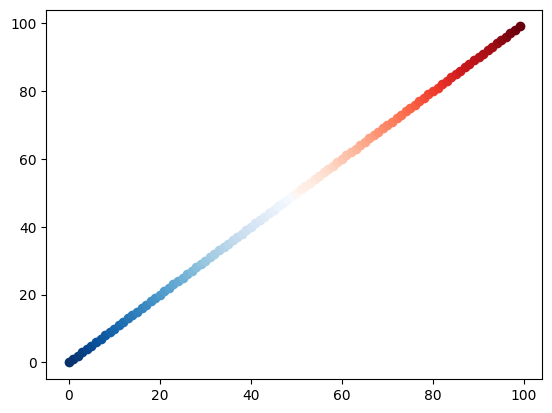

In [4]:
colors = create_blue_white_red_colorbar(100)

for i in range(len(colors)):
    plt.scatter(i, i, color = colors[i])

In [26]:
pd.read_csv("data/data_sectors_0_1.csv")

,latitude,longitude,value
0,52.410025,12.749780,22.0
1,52.410025,12.765038,96.0
2,52.425409,12.749780,69.0
3,52.425409,12.765038,49.0


### Heatmap interpolata

In [ ]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import HeatMap
from scipy.stats import gaussian_kde

# Read the data from the CSV
df = pd.read_csv('data.csv')  # Your CSV with columns: latitude, longitude, value
latitudes = df['latitude'].values
longitudes = df['longitude'].values
values = df['value'].values

# Create a KDE (Kernel Density Estimation) model based on latitudes and longitudes
kde = gaussian_kde([latitudes, longitudes], weights=values)

# Define the 1000x1000 grid over which to evaluate the KDE
grid_latitudes = np.linspace(min(latitudes), max(latitudes), 1000)
grid_longitudes = np.linspace(min(longitudes), max(longitudes), 1000)
grid_lon, grid_lat = np.meshgrid(grid_longitudes, grid_latitudes)

# Evaluate the KDE over the grid
grid_coords = np.vstack([grid_lon.ravel(), grid_lat.ravel()])
density_values = kde(grid_coords)

# Reshape the density values to match the grid
density_values = density_values.reshape(grid_latitudes.size, grid_longitudes.size)

# Prepare the data for HeatMap, with latitude, longitude, and density values
heat_data = []
for i in range(len(grid_latitudes)):
    for j in range(len(grid_longitudes)):
        heat_data.append([grid_latitudes[i], grid_longitudes[j], density_values[i, j]])

# Create the map centered around the mean latitude and longitude
map_center = [np.mean(latitudes), np.mean(longitudes)]
m = folium.Map(location=map_center, zoom_start=12)

# Add the heatmap to the map
HeatMap(heat_data, radius=15, blur=25, min_opacity=0.3).add_to(m)

# Save the resulting map as an HTML file
m.save('continuous_heatmap_1000x1000.html')


In [ ]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import HeatMap
from scipy.stats import gaussian_kde

# Read the data from the CSV
df = pd.read_csv('data.csv')  # Your CSV with columns: latitude, longitude, value
latitudes = df['latitude'].values
longitudes = df['longitude'].values
values = df['value'].values

# Create a KDE (Kernel Density Estimation) model based on latitudes and longitudes
kde = gaussian_kde([latitudes, longitudes], weights=values)

# Define the 1000x1000 grid over which to evaluate the KDE
grid_latitudes = np.linspace(min(latitudes), max(latitudes), 1000)
grid_longitudes = np.linspace(min(longitudes), max(longitudes), 1000)
grid_lon, grid_lat = np.meshgrid(grid_longitudes, grid_latitudes)

# Evaluate the KDE over the grid
grid_coords = np.vstack([grid_lon.ravel(), grid_lat.ravel()])
density_values = kde(grid_coords)

# Reshape the density values to match the grid
density_values = density_values.reshape(grid_latitudes.size, grid_longitudes.size)

# Prepare the data for HeatMap, with latitude, longitude, and density values
heat_data = []
for i in range(len(grid_latitudes)):
    for j in range(len(grid_longitudes)):
        heat_data.append([grid_latitudes[i], grid_longitudes[j], density_values[i, j]])

# Create the map centered around the mean latitude and longitude
map_center = [np.mean(latitudes), np.mean(longitudes)]
m = folium.Map(location=map_center, zoom_start=12)

# Add the heatmap to the map
HeatMap(heat_data, radius=15, blur=25, min_opacity=0.3).add_to(m)

# Save the resulting map as an HTML file
m.save('continuous_heatmap_1000x1000.html')
